# Lecture 5, 10.11.2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from math import *
from scipy.integrate import odeint

In [2]:
# Interactive Widgets
import ipywidgets as widgets
from IPython.display import HTML
from ipywidgets import interact, IntSlider, FloatSlider, Layout

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

## FritzhughNagumo-Model

In [3]:
def nagumo(x, t, a, b, e, I):
    #x[0] is u         - membrane voltage
    #x[1] is w         - recovery variable 
    # dx1dt is u_dot  - change of membrane voltage over time
    # dx2dt is w_dot  - change of recovery
    
    #t is time
    #a is a
    #b is b           - threshold value
    #e is epsilon
    #I is I            - external injection current
    
    dx1dt = a*x[0]*(x[0]-b)*(1-x[0])-x[1]+I 
    dx2dt = e*(x[0]-x[1])
        
    return [dx1dt, dx2dt]

In [4]:
def plot_nullclines(a, b, I, e): # ! FritzhughNagumo-Model spefic !
    # u nullcline
    u = np.linspace(-1, 2, 100)
    w = a*u*(u-b)*(1-u)+I
    plt.plot(u, w)
    
    # w nullcline
    w = np.linspace(-1, 1)
    u = w
    plt.plot(u, w)
    
#plot_nullclines (a,b,I,e)    

In [5]:
def renorm(tr0,tr1,td): #renormalization function
    #reads in two points tr0, tr1 and a target distance
    #returns a difference vector unpurtraj to new pertraj
    #also returns the original distance between the two points
    #new point has the same direction as the vector tr0-tr1
    #but distance to tr0 is the target distance
    
    vector = td * (tr0-tr1)/(np.linalg.norm(tr0-tr1)) #length*vector/abs(vector)
    length = np.linalg.norm(tr0-tr1)
    
    return vector, length

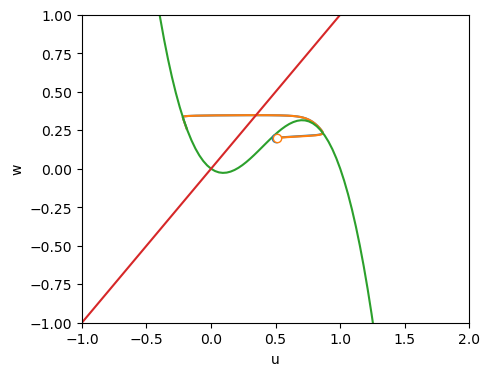

In [6]:
%matplotlib inline    
    
nagumo_fig = plt.figure(figsize=(5,4))
    
plt.xlim(-1, 2)  #coordinate system
plt.ylim(-1, 1)
plt.xlabel('u')
plt.ylabel('w')

 #starting values
a=3
b=0.2 
I=0 
e=0.01

#starting point coordinates
u0=0.5
w0=0.2
x0 = [u0 ,w0] #starting point as vector


pertubation = 0.01 #0.01 #length of pertubation at the start and target distance
x0_1 = x0.copy() #creating of perturbed vector as pure copy of starting vector
x0_1[0] = x0[0]+pertubation #adding purtubation in 1st dimension

#Define Running Time in the System
Tmax=50 #running time
ts = np.linspace(0,Tmax,round(Tmax*10))

#calc 1st trajectory
traj = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0, ts)
lh = plt.plot(traj[:,0], traj[:,1])

#calc 2nd trajectory
traj_1 = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0_1, ts)
lh_1 = plt.plot(traj_1[:,0], traj_1[:,1])


plt.figure(nagumo_fig)
plot_nullclines (a,b,I,e) # plot ! FritzhughNagumo-Model spefic ! nullcines of the system with the parameters above 

plt.plot(*x0, 'bo', markeredgecolor = lh[0].get_color(), markerfacecolor = 'w') #starting point x0
plt.plot(*x0_1, 'bo', markeredgecolor = lh_1[0].get_color(), markerfacecolor = 'w') #starting point x0


    

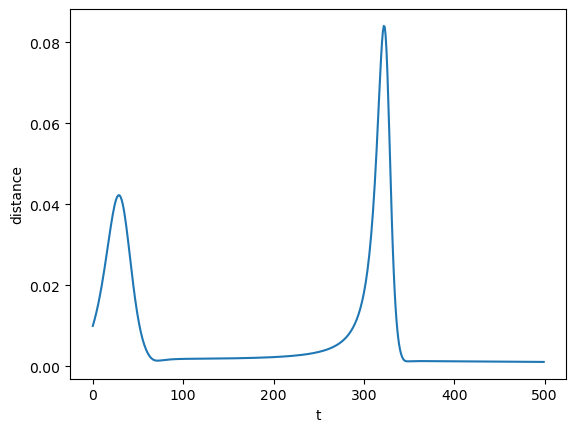

In [7]:
#distance between 2 slightly perturbed trajectoris

u_A = traj[:,0]
w_A = traj[:,1]
u_B = traj_1[:,0]
w_B = traj_1[:,1]
plt.xlabel('t')
plt.ylabel('distance')

plt.plot(((u_A-u_B)**2+(w_A-w_B)**2)**(1/2))

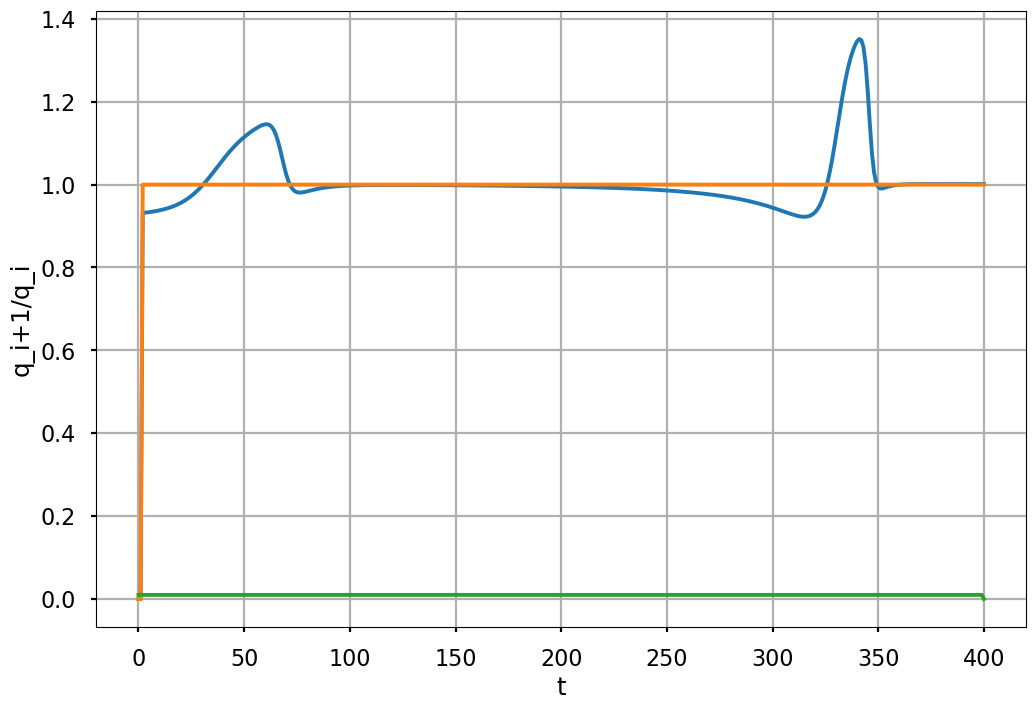

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters

#function of nagumo via time
f= lambda t,x: np.array(nagumo(x,t,a,b,e,I))
h = 0.1 # Step size of the mathmatical aglorithm 

TimeOverAll = 40 #10000 #is about max #50000 is to much
t = np.arange(0, TimeOverAll + h, h) # Numerical grid


##############
#print(x0)
#print(x0_1)
##############

#start values of trajectories
s0 = x0 #unpur traj start
s0_1 = x0_1 #once purturbed traj
s0_2 = x0_1 #renorm traj starts atsame point as pur traj
pur = np.linalg.norm(np.asarray(x0_1)-np.asarray(x0)) # starting pertubation distance
###########################################

# Explicit Euler Method

s = np.zeros((len(t),2)) #traj of unpur state Array 2 columns, t lines
s_1 = np.zeros((len(t),2)) #traj of purstate

q = np.zeros(len(t))  #Euclidean unpur traj to purtraj t0-t1
qstep = np.zeros(len(t)) #Increasement of last step's Euclidean

d = np.zeros(len(t))  #Euclidean unpur - renormalied t0-t2
dstep = np.zeros(len(t)) #Increasement of last step's Euclidean renormalizeversion

pert = np.zeros(len(t)) #distance between t0 and t2 from the function


s_2=np.zeros((len(t),2)) #traj of renormalized purstate

s[0] = s0  #initial conditions in first lines of traj-arrays
s_1[0] = s0_1
s_2[0] = s0_2


for i in range(0, len(t) - 1):
    
    re=renorm(s[i],s_2[i],pur)
    pert[i]=re[1]
                    
                    
    s[i + 1] = s[i] + h*f(t[i], s[i]) #One Euler Step for the first traj 
    s_1[i + 1] = s_1[i] + h*f(t[i], s_1[i]) #2nd traj
    s_2[i + 1] = s[i+1]+re[0] #add renormaliztion distance to origial traj to receive renormalized purtraj 
    q[i+1] = np.linalg.norm(s[i+1] - s_1[i+1]) #calc distance between unpur traj and purtraj AT THIS STEP
    qstep[i+1] = q[i]/q[i+1] #quotient between q_i+1 and q_i
    
    d[i+1] = np.linalg.norm(s[i+1] - s_2[i+1]) #calc distance to renorm traj AT THIS STEP
    dstep[i+1] = d[i]/d[i+1] #quotient between q_i+1 and q_i

    
plt.figure(figsize = (12, 8))

plt.xlabel('t')
plt.ylabel('q_i+1/q_i')
plt.plot(qstep) #draw quotient between q_i+1 and q_i
plt.plot(dstep)
plt.plot(pert)

#plt.title('PreStep for Lyapunov')
plt.grid()
#plt.legend(loc='lower right')
plt.show()

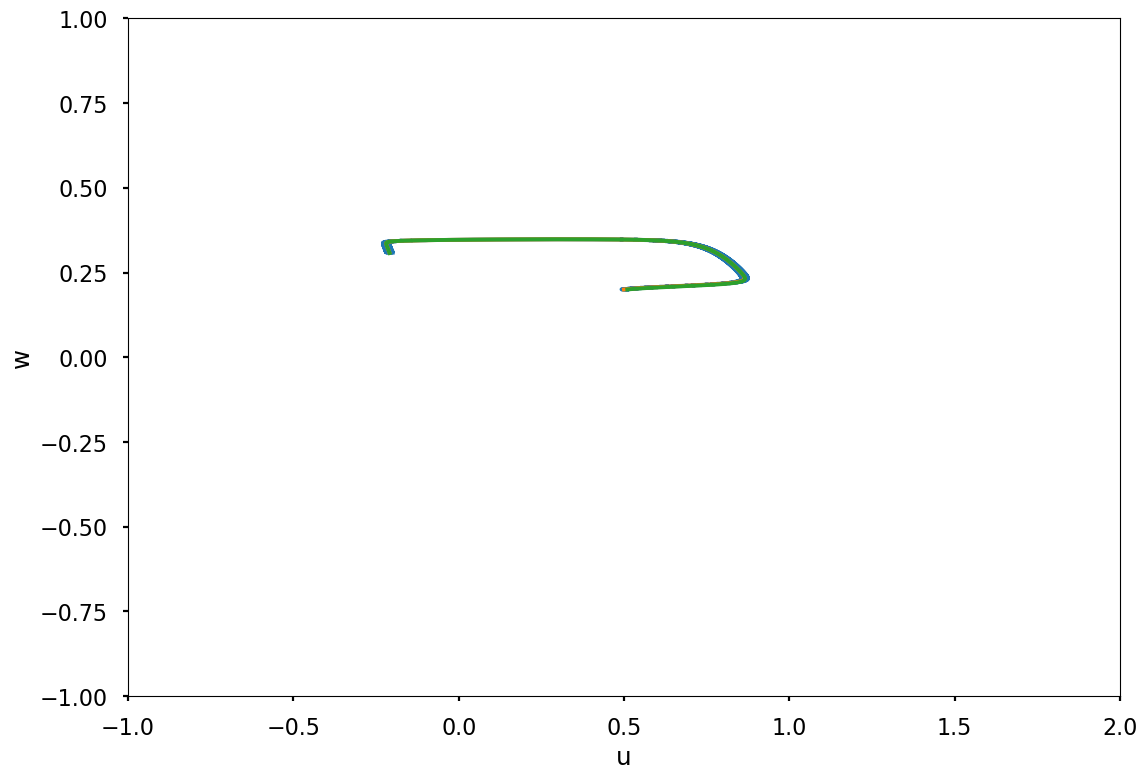

In [9]:
plt.xlim(-1, 2)  #coordinate system
plt.ylim(-1, 1)
plt.xlabel('u')
plt.ylabel('w')

plt.plot(s_2[:,0], s_2[:,1])
plt.plot(s[:,0], s[:,1])
plt.plot(s_1[:,0], s_1 [:,1])

interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='a', layout=Layout(width='99…

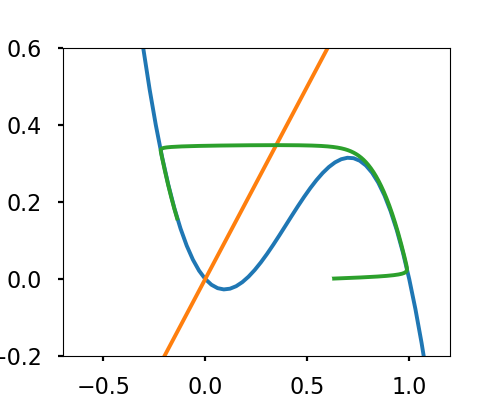

In [10]:
%matplotlib widget 
# interactive FN-Model to play around 
plt.close("all")
nagumo_fig = plt.figure(figsize=(5,4))

def nagumo_interactive(a = 3, b = 0.2, I = 0 , e = 0.01 , Tmax = 20, init_u=0.02, init_w =0):
    
    plt.figure(nagumo_fig)
    plt.clf()
    plot_nullclines (a,b,I,e)
    ts = np.linspace(0,Tmax,round(Tmax*10))
    x0 = [0 + init_u ,0 + init_w] #starting conditions
    traj = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0, ts) #trajectory defined by ODEint
    lh = plt.plot(traj[:,0], traj[:,1])  
    
    
    
    plt.plot(*x0, 'bo', markeredgecolor = lh[0].get_color(), markerfacecolor = 'w') #starting point x0
    plt.xlim(-0.7,1.2)
    plt.ylim(-0.2,0.6)
    plt.xlabel('$u$')
    plt.ylabel('$w$')    
    
interact(nagumo_interactive,
         
         a = FloatSlider(min=0, max=5, step=0.01, value=3, continuous_update=False, description='a', style=style, layout=slider_layout),
         b = FloatSlider(min=0, max=2, step=0.01, value=0.2, continuous_update=False, description='b', style=style, layout=slider_layout),
         e = FloatSlider(min=0, max=0.1, step=0.0001, value=0.01, continuous_update=False, description='e', style=style, layout=slider_layout),
         I = FloatSlider(min=-1, max=1, step=0.1, value=0, continuous_update=False, description='I', style=style, layout=slider_layout),
         Tmax = FloatSlider(min=10, max=500, step=10, value=100, continuous_update=False, description='Tmax', style=style, layout=slider_layout),
         init_u = FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.58, continuous_update=False, description='u0', style=style, layout=slider_layout),
         init_w = FloatSlider(min=-1.0, max=1.0, step=0.02, value=0, continuous_update=False, description='w0', style=style, layout=slider_layout),
        
        );



interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='a', layout=Layout(width='99…

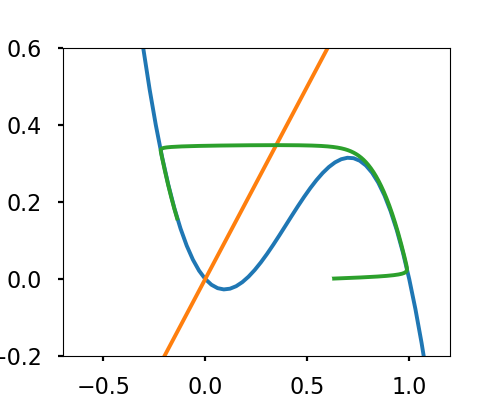

In [11]:
%matplotlib widget 
# interactive FN-Model to play around 
plt.close("all")
nagumo_fig = plt.figure(figsize=(5,4))

def nagumo_interactive(a = 3, b = 0.2, I = 0 , e = 0.01 , Tmax = 20, init_u=0.02, init_w =0):
    
    plt.figure(nagumo_fig)
    plt.clf()
    plot_nullclines (a,b,I,e)
    ts = np.linspace(0,Tmax,round(Tmax*10))
    x0 = [0 + init_u ,0 + init_w] #starting conditions
    traj = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0, ts) #trajectory defined by ODEint
    lh = plt.plot(traj[:,0], traj[:,1])  
    
    
    
    plt.plot(*x0, 'bo', markeredgecolor = lh[0].get_color(), markerfacecolor = 'w') #starting point x0
    plt.xlim(-0.7,1.2)
    plt.ylim(-0.2,0.6)
    plt.xlabel('$u$')
    plt.ylabel('$w$')    
    
interact(nagumo_interactive,
         
         a = FloatSlider(min=0, max=5, step=0.01, value=3, continuous_update=False, description='a', style=style, layout=slider_layout),
         b = FloatSlider(min=0, max=2, step=0.01, value=0.2, continuous_update=False, description='b', style=style, layout=slider_layout),
         e = FloatSlider(min=0, max=0.1, step=0.0001, value=0.01, continuous_update=False, description='e', style=style, layout=slider_layout),
         I = FloatSlider(min=-1, max=1, step=0.1, value=0, continuous_update=False, description='I', style=style, layout=slider_layout),
         Tmax = FloatSlider(min=10, max=500, step=10, value=100, continuous_update=False, description='Tmax', style=style, layout=slider_layout),
         init_u = FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.58, continuous_update=False, description='u0', style=style, layout=slider_layout),
         init_w = FloatSlider(min=-1.0, max=1.0, step=0.02, value=0, continuous_update=False, description='w0', style=style, layout=slider_layout),
        
        );

